# 方策評価

In [1]:
# 指定した回数で価値関数を更新する
V = {'L1': 0.0, 'L2': 0.0}
V_new = V.copy()

for _ in range(100):
    V_new['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    V_new['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = V_new.copy()
    print(V)

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

In [2]:
# 更新の大きさで、計算回数を制御
V = {'L1': 0.0, 'L2': 0.0}
V_new = V.copy()

cnt = 0  # 何回更新したのかをカウント
while True:
    V_new['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    V_new['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

    delta = abs(V_new['L1'] - V['L1'])
    delta = max(delta, abs(V_new['L2'] - V['L2']))
    V = V_new.copy()

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


In [3]:
# このように上書き方式で計算することで、計算回数が少なくなる
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0
while True:
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


# より大きな問題へ

In [4]:
import numpy as np
import common.gridworld_render as render_helper

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = {
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)
        self.start_state = (2, 0)
        self.agent_state = self.start_state
    
    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)
                
    def next_state(self, state, action):
        # ① ゴールもしくは壁の場合
        is_goal = (state == self.goal_state)
        is_wall = (self.reward_map[state] is None)
        if is_goal or is_wall:
            return None

        # ② 移動先の場所の計算
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        # ③ 移動先が壁の場合は移動できない
        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height or \
                self.reward_map[next_state] is None:
                    next_state = state

        return next_state  # ④ 次の状態を返す

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]
    
    def render_v(self, v=None, policy=None, print_value=True):
        renderer = render_helper.Renderer(self.reward_map, self.goal_state)
        renderer.render_v(v, policy, print_value)

    def render_q(self, q=None, print_value=True):
        renderer = render_helper.Renderer(self.reward_map, self.goal_state)
        renderer.render_q(q, print_value)

In [5]:
env = GridWorld()

# propertyデコレータを使ってることで、インスタンス変数としてアクセス可能
# env.height() ではなく env.height 
print(env.height) 

print(env.width) 
print(env.shape)

3
4
(3, 4)


In [6]:
for action in env.actions():
    print(action)

print('===')

# yieldを使うことで、一時停止した状態から再開される
for state in env.states():
    print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


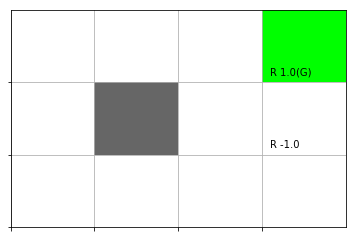

In [7]:
# render_v() で描画可能、左下に報酬が書かれている
env = GridWorld()
env.render_v()

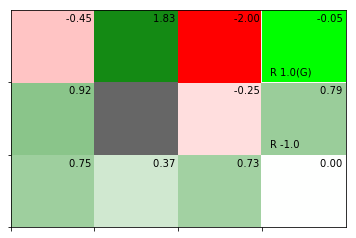

In [8]:
# 価値関数を引数に渡すと、右上の数値に描画される
env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()  # ダミーの状態価値関数
env.render_v(V)

In [9]:
# 今まではこのようにディクショナリを初期化していた
env = GridWorld()
V = {}

# ディクショナリの要素の初期化
for state in env.states():
    V[state] = 0

state = (1, 2)
print(V[state])  # 状態 (1,2) の価値関数を出力

0


In [10]:
# defaultdictを使うことで、辞書のデフォルトの値を設定可能
from collections import defaultdict  # defaultdictをインポート
from common.gridworld import GridWorld

env = GridWorld()
V = defaultdict(lambda: 0)

state = (1, 2)
print(V[state])  # 0 

0


In [11]:
# ランダムな方策も以下のように実装できる
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})

state = (0, 1)
print(pi[state])  # {0:0.25, 1:0.25, 2:0.25, 3:0.25}

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [12]:
def eval_onestep(pi, V, env, gamma=0.9):
    delta = 0

    # 座標を順番にループ
    for state in env.states():
        # 方策を取得
        action_probs = pi[state]
        new_v = 0

        # 行動と行動確率をループ
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            if next_state is not None:
                # 報酬を計算
                r = env.reward(state, action, next_state)
                new_v += action_prob * (r + gamma * V[next_state])  # 式にしたがって価値関数を更新

        delta = max(delta, abs(V[state] - new_v))
        V[state] = new_v

    return V, delta

In [13]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        # Vとdeltaを更新する
        V, delta = eval_onestep(pi, V, env, gamma)
        # deltaが小さいと計算終了
        if delta < threshold:
            break
    return V

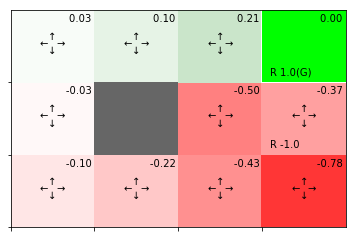

In [14]:
env = GridWorld()
gamma = 0.9

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

# 方策反復法

In [15]:
# argmaxを定義
def argmax(d):
    max_value = max(d.values())
    max_key = -1
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key

In [16]:
action_values = {0: 0.1, 1: -0.3, 2:9.9, 3:-1.3} 

max_action = argmax(action_values)
print(max_action)

2


In [17]:
# 方策の改善
def get_greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            value = 0

            if next_state is not None:
                r = env.reward(state, action, next_state)
                value += r + gamma * V[next_state]
            action_values[action] = value # 式に従って更新

        max_action = argmax(action_values) # 式に従って更新
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0} 
        action_probs[max_action] = 1.0
        pi[state] = action_probs

    return pi

In [18]:
# 方策反復法を実装
def policy_iter(env, gamma, threshold=0.001, is_render=False):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold) # 評価
        new_pi = get_greedy_policy(V, env, gamma) # 改善

        # 可視化
        if is_render:
            env.render_v(V, pi)

        if new_pi == pi: # 方策が変化しない場合は終了
            break
            
        pi = new_pi # 方策の更新
    return pi

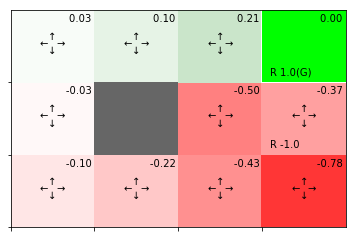

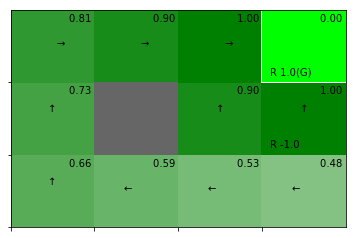

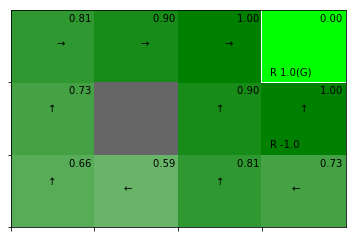

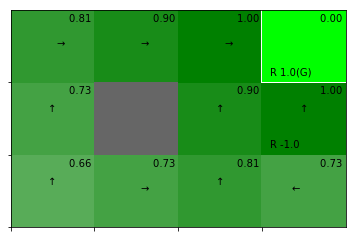

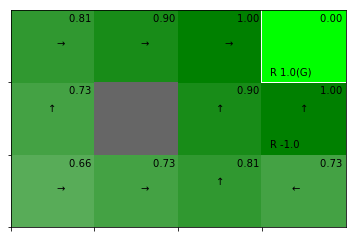

In [19]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma, is_render=True)

# 価値反復法

In [20]:
def value_iter_onestep(env, gamma, V):
    delta = 0

    for state in env.states():
        action_values = []

        for action in env.actions():
            next_state = env.next_state(state, action)

            if next_state is not None:
                r = env.reward(state, action, next_state)
                value = r + gamma * V[next_state] 
                action_values.append(value)


        if len(action_values) > 0:
            new_value = max(action_values)
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value

    return V, delta

In [21]:
def value_iter(env, gamma, threshold=0.001, is_render=True):
    V = defaultdict(lambda: 0)

    while True:
        if is_render:
            env.render_v(V)
            
        # 評価はonestepだけ行うのが価値反復法
        V, delta = value_iter_onestep(env, gamma, V)
        if delta < threshold:
            break
    return V

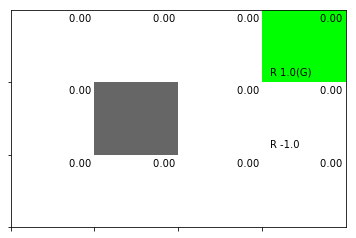

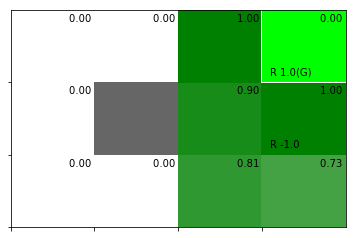

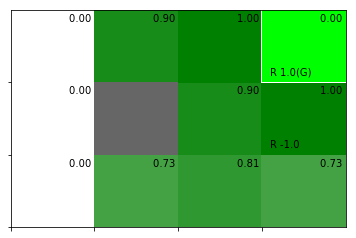

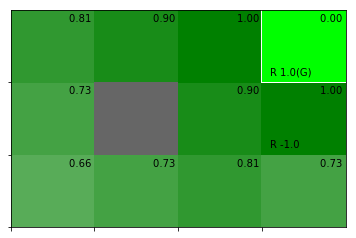

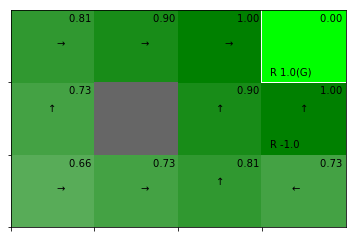

In [22]:
env = GridWorld()
gamma = 0.9
V = value_iter(env, gamma)

pi = get_greedy_policy(V, env, gamma)
env.render_v(V, pi)